Questions to Answer:
- 1a. Examine the state column to see unique values and counts.
- 1b. Show a pie chart of the state project count for all projects.
- 1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.
note - from here out we'll be looking at the completed project data unless mentioned otherwise

- 2a. What is the overall success rate for all completed kickstarter projects?
- 2b. Which 5 projects were pledged the most money (usd_pledged_real)?
- 2c. Which 5 projects had the most backers?
- 2d. Which year had the most competition? (# of projects)

- 3a. What is the success rate for all projects broken down by main_category?
- 3b. Show a horizontal bar chart for project success rate by main_category, sorted by highest to lowest.
- 3c. Within the Games main_category, what is the success rate for each category within it?

- 4a. Calculate the 'pct_of_goal' for each completed project
- 4b. What were the top 5 projects when looking at pct_of_goal for all time?
- 4c. Plot a histogram distribution of all completed projects by pct_of_goal
- 4d. Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)

- 5a. What is the average usd_goal_real for all completed kickstarter projects, broken down by main_category.
- 5b. What is the median usd_goal_real for all completed kickstarter projects, broken down by main_category.
- 5c. What is the average usd_pledged_real for all completed kickstarter projects, broken down by main_category.
- 5d. What is the median usd_pledged_real for all completed kickstarter projects, broken down by main_category.
- 5e. What insights does this information provide?
- 5f. Based on this information, if someone wanted to choose the main_category with the highest combined success rate and pledged dollar amount, which one would you recommend?

- 6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.
- 6b. Compare the avg months for successful projects vs non-successful. Add visuals if you'd like.
- 6c. Does the length of a project in months seem to have an impact?

Let's zoom in on Games: Video Games (main_category: category)

- 7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).
- 7b. Do this again but broken down by deadline year
- 7c. Show this in a bar chart
- 7d. What insights does this data provide you?

Let's zoom in on personal planners

- 8a. Calculate the project count, success rate, and pct_of_goal for all projects with 'planner' in the name. Check for spelling variations in upper/lowercase.
- 8b. How about all projects with both 'planner' and 'Panda' in the name?
- 8c. Congrats Panda Planner! (That's my bro's company)

Bonus insights - feel free to add any other interesting findings from the dataset here

Future ML project: Given a sample kickstarter project, can you predict the usd_pledged_real, and whether it will be successful? What features (data points) are most important in determining if a project will be successful or not?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
print(df.shape)
df.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### Questions for 1

In [6]:
# Unique values and counts of state column
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

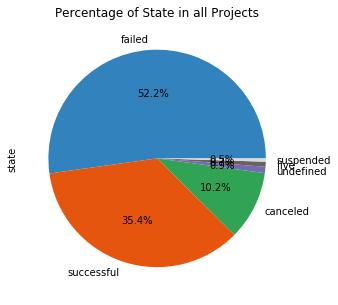

In [7]:
# Show a Pie chart for all the projects
df.state.value_counts().plot.pie(y='state', title='Percentage of State in all Projects', 
                                 autopct='%1.1f%%', colormap='tab20c', figsize=(5,5))

In [8]:
# Show a "Completed" state
failed = df.state == 'failed'
successful = df.state == 'successful'
canceled = df.state =='canceled'
combined = failed | successful | canceled
print(df.loc[combined].shape)
print(df.loc[combined].state.value_counts())
df.loc[combined].head()

(370454, 15)
failed        197719
successful    133956
canceled       38779
Name: state, dtype: int64


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Questions for 2

In [9]:
# Overall success rate for all completed projects
success_rate = len(df.loc[successful]) / len(df.loc[combined]) * 100
print("{:.2f}% is the success rate of all completed projects".format(success_rate))

36.16% is the success rate of all completed projects


In [10]:
# Top 5 projects pledged the most money using usd_pledged_real
df.sort_values('usd_pledged_real', ascending=False)[['name', 'usd_pledged_real']].head()

,name,usd_pledged_real
157270,"Pebble Time - Awesome Smartwatch, No Compromises",20338986.27
250254,COOLEST COOLER: 21st Century Cooler that's Act...,13285226.36
216629,"Pebble 2, Time 2 + All-New Pebble Core",12779843.49
289915,Kingdom Death: Monster 1.5,12393139.69
282416,Pebble: E-Paper Watch for iPhone and Android,10266845.74


In [11]:
# Top 5 projects with most backers
df.sort_values('backers', ascending=False)[['name', 'backers']].head()

,name,backers
187652,Exploding Kittens,219382
75900,Fidget Cube: A Vinyl Desk Toy,154926
292244,"Bring Reading Rainbow Back for Every Child, Ev...",105857
148585,The Veronica Mars Movie Project,91585
182657,Double Fine Adventure,87142


In [12]:
# Which year had the most competition of # of projects

# Make a year column into df
df['year'] = pd.to_datetime(df.launched).dt.year
df.year.value_counts().head()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
Name: year, dtype: int64

### Questions for 3

In [13]:
# Success rate for all projects by main_category

len(df.loc[successful, 'main_category']) / len(df) * 100

35.37623362321443

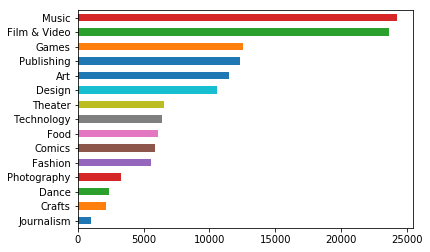

In [14]:
# Plot a bar chart for success projects by main_category
df.loc[successful, 'main_category'].value_counts(ascending=True).plot(kind='barh')

In [15]:
# Within games of main_category, what is the success rate for each category
main_category_games = df.main_category == 'Games'
df.loc[successful & main_category_games].category.value_counts(normalize=True, ascending=False) * 100

Tabletop Games     62.837514
Video Games        19.060553
Playing Cards       7.724876
Games               6.223039
Live Games          1.437929
Mobile Games        1.222240
Gaming Hardware     0.790861
Puzzles             0.702988
Name: category, dtype: float64

### Questions for 4
I'm confused with the questions. Maybe I don't understand it

### Questions for 5

In [16]:
# Average usd_goal_real for all completed projects by main_category
df.loc[combined].pivot_table(index='main_category', values='usd_goal_real', 
                             aggfunc=np.mean).sort_values('usd_goal_real', ascending=False)

,usd_goal_real
main_category,
Technology,102154.155936
Film & Video,82375.686055
Journalism,65528.614392
Food,48661.356201
Games,45148.243871
Design,42199.323873
Art,39467.623304
Theater,27147.451041
Publishing,22590.745149


In [17]:
# Median usd_goal_real for all completed projects by main_category
df.loc[combined].pivot_table(index='main_category', values='usd_goal_real', 
                             aggfunc=np.median).sort_values('usd_goal_real', ascending=False)

,usd_goal_real
main_category,
Technology,20000.00
Design,10000.00
Food,10000.00
Games,8000.00
Film & Video,7000.00
Fashion,5983.55
Journalism,5000.00
Publishing,5000.00
Music,4000.00


In [18]:
# Average usd_pledged_real for all completed projects by main_category
df.loc[combined].pivot_table(index='main_category', values='usd_pledged_real', 
                             aggfunc=np.mean).sort_values('usd_pledged_real', ascending=False)

,usd_pledged_real
main_category,
Design,24546.889746
Games,21288.432988
Technology,21186.435891
Comics,6653.781332
Film & Video,6248.147383
Fashion,5762.372201
Food,5140.292239
Theater,4016.933189
Music,3924.105566


In [19]:
# Median usd_pledged_real for all completed projects by main_category
df.loc[combined].pivot_table(index='main_category', values='usd_pledged_real', 
                             aggfunc=np.median).sort_values('usd_pledged_real', ascending=False)

,usd_pledged_real
main_category,
Design,1925.850
Dance,1865.565
Theater,1567.000
Comics,1506.500
Games,1324.960
Music,1010.495
Film & Video,760.000
Art,431.340
Technology,317.000


Technology results top on both goal and pledged. People are really interested to technological developed equipments. Based on the result, I would recommend the technology of main category.

### Questions for 6

In [20]:
# Create a new column months to compute the active between launch and deadline
df['months'] = pd.to_datetime(df.deadline) - pd.to_datetime(df.launched)

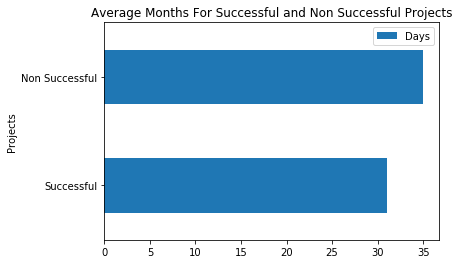

In [21]:
# Compare the avg months for successful and non successful projects
data = {'Projects':['Successful', 'Non Successful'],
       'Days':[round(df.loc[successful].months.dt.days.mean()),
              round(df.loc[failed | canceled].months.dt.days.mean())]}
avg_months = pd.DataFrame(data)
avg_months.set_index('Projects').plot(kind='barh', title="Average Months For Successful and Non Successful Projects")

### Questions for 7

In [22]:
# Calculate the expected value for the Games: Video Games category, 
# with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects)
games_video_games = df.category == 'Video Games'
df.loc[successful & main_category_games & games_video_games].usd_pledged_real.median()

11227.92

In [23]:
# By deadline year
df.loc[successful & main_category_games & games_video_games].groupby(pd.to_datetime(df.deadline).dt.year).usd_pledged_real.median()

deadline
2009     1559.000
2010     2785.000
2011     6030.000
2012    14430.910
2013    16182.755
2014    13474.660
2015    10347.430
2016    10069.005
2017    10281.960
Name: usd_pledged_real, dtype: float64

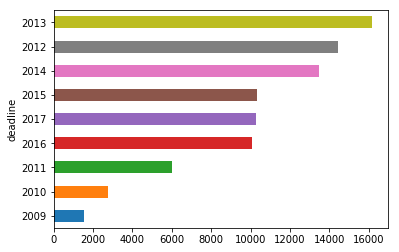

In [24]:
# Plot in bar chart with sorting
df.loc[successful & main_category_games & games_video_games].groupby(pd.to_datetime(df.deadline).dt.year).usd_pledged_real.median().sort_values().plot(kind='barh')

The peak of usd pledged in video games is between the year 2012 to 2014. After 2014, people support less in video games in the following years.

### Questions for 8

In [25]:
# Calculate the project count, success rate, and pct_of_goal for all projects with 'planner' in the name
name_with_planner = df.name.str.lower().str.contains('planner', na=False)
print("The number of all projects with 'planner' in the name is {}".format(df.loc[name_with_planner].name.count()))
print("The number of all projects with 'planner' in the name with success is {}".format(df.loc[successful & name_with_planner].name.count()))

# I couldn't understand the pct_of_goal

The number of all projects with 'planner' in the name is 367
The number of all projects with 'planner' in the name with success is 128


In [26]:
# How about all projects with both 'planner' and 'panda' in the name
name_with_panda = df.name.str.lower().str.contains('panda', na=False)
print("The number of all projects with 'planner' and 'panda' in the name is {}".format(df.loc[name_with_planner & name_with_panda].name.count()))
print("The number of all projects with 'planner' and 'panda' in the name with success is {}".format(df.loc[successful & name_with_planner & name_with_panda].name.count()))


The number of all projects with 'planner' and 'panda' in the name is 1
The number of all projects with 'planner' and 'panda' in the name with success is 1


In [27]:
df.loc[name_with_planner & name_with_panda]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,year,months
374940,980774782,Panda Planner Pro: Happiness + Productivity = ...,Product Design,Design,USD,2016-04-02,10000.0,2016-02-29 17:00:53,26944.0,successful,829,US,26944.0,26944.0,10000.0,2016,32 days 06:59:07
